<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/BQm_EV6i0_j80CQZ8vcLvw/SN-web-lightmode.png" width=300 height=300 />


## Lab: Practical Application of Transpose Convolution  

**Estimated time needed: 30 minutes**

This lab will guide you through creating, training, and evaluating models that use transpose convolution layers for tasks such as image reconstruction. 

##### Learning objectives: 

By the end of this lab, you will: 

- Apply transpose convolution in practical scenarios using Keras.  

- Create, compile, train, and evaluate the model 

- Visualize the results  

##### Prerequisites: 

- Basic understanding of Python programming 

- Familiarity with convolutional neural network (CNN) concepts 

- Keras and TensorFlow installed 




#### Steps: 
**Step 1: Import Necessary Libraries**

Before you start, make sure to import the required libraries: TensorFlow and Keras. Keras is included within TensorFlow as `tensorflow.keras`. 


In [1]:
import warnings
warnings.simplefilter('ignore')

!pip install tensorflow==2.16.2 

!pip install matplotlib 
import tensorflow as tf 

from tensorflow.keras.models import Model 

from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, UpSampling2D 

import numpy as np 

import matplotlib.pyplot as plt 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.8/590.8 MB 21.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 106.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 138.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 50.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 48.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 158.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 142.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 89.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

2025-04-01 10:46:48.454923: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-01 10:46:48.456198: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-01 10:46:48.461562: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-01 10:46:48.474541: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-01 10:46:48.503198: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registe

**Explanation:**

 `tensorflow` is the main library for machine learning in Python. 

  `Model, Input, Conv2D, and Conv2DTranspose` are used to create and manipulate the layers in your model. 

  `numpy` and `matplotlib` are used for data manipulation and visualization. 

 
**Step 2: Define the Input Layer**

You need to define the input shape for your model. For simplicity, let's assume you are working with an input image of size 28x28 with 1 channel (grayscale). 

 


In [2]:
input_layer = Input(shape=(28, 28, 1))

**Explanation:**

`Input(shape=(28, 28, 1))` creates an input layer that expects 28x28 grayscale images.


**Step 3: Add convolutional and transpose convolutional layers**

You will add a convolutional layer to extract features, followed by a transpose convolution layer to reconstruct the image. 


In [3]:
conv_layer = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(input_layer) 

transpose_conv_layer = Conv2DTranspose(filters=1, kernel_size=(3, 3), activation='sigmoid', padding='same')(conv_layer) 


**Explanation:**

`Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')` creates a convolution layer with 32 filters. 

`Conv2DTranspose(filters=1, kernel_size=(3, 3), activation='sigmoid', padding='same')` creates a transpose convolution layer for reconstructing the image. 

**Step 4: Create the Model**

Now, you will create the model by specifying the input and output layers.


In [4]:
model = Model(inputs=input_layer, outputs=transpose_conv_layer)

**Explanation:**

`Model(inputs=input_layer, outputs=transpose_conv_layer)` creates a Keras model that connects the input layer to the output layer through the convolutional and transpose convolutional layers.  

**Step 5: Compile the Model**

Before training the model, you need to compile it. You will specify the loss function, optimizer, and evaluation metrics. 


In [5]:
model.compile(optimizer='adam', loss='mean_squared_error')

**Explanation:**

- optimizer=`adam` specifies the Adam optimizer. 

- loss=`binary_crossentropy` specifies the binary cross-entropy loss function, suitable for binary pixel classification.  


**Step 6: Train the Model**

You can now train the model on some training data. For this example, let's assume X_train is our training input data.


In [6]:
# Generate synthetic training data 

X_train = np.random.rand(1000, 28, 28, 1) 

y_train = X_train # For reconstruction, the target is the input 

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2) 

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0799 - val_loss: 0.0612
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0554 - val_loss: 0.0389
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0342 - val_loss: 0.0218
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0190 - val_loss: 0.0121
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0107 - val_loss: 0.0074
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0068 - val_loss: 0.0053
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0050 - val_loss: 0.0043
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0042 - val_loss: 0.0037
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0037 - val_loss: 0.0033
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0032 - val_loss: 0.0029


**Explanation:**

- X_train is a placeholder for your actual training data. 

- y_train is the same as X_train for image reconstruction. 

- model.fit trains the model for a specified number of epochs and batch size.

  
**Step 7: Evaluate the Model**

After training, you can evaluate the model on test data to see how well it performs. 


In [7]:
 # Generate synthetic test data 

X_test = np.random.rand(200, 28, 28, 1) 

y_test = X_test 

loss = model.evaluate(X_test, y_test) 

print(f'Test loss: {loss}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0029
Test loss: 0.0028604783583432436


**Explanation:**

`X_test` and `y_test` are placeholders for your actual test data. 

`model.evaluate` computes the loss of the model on test data. . 

**Step 8: Visualize the Results**

To better understand the model's performance, let's visualize some reconstructed images.  


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


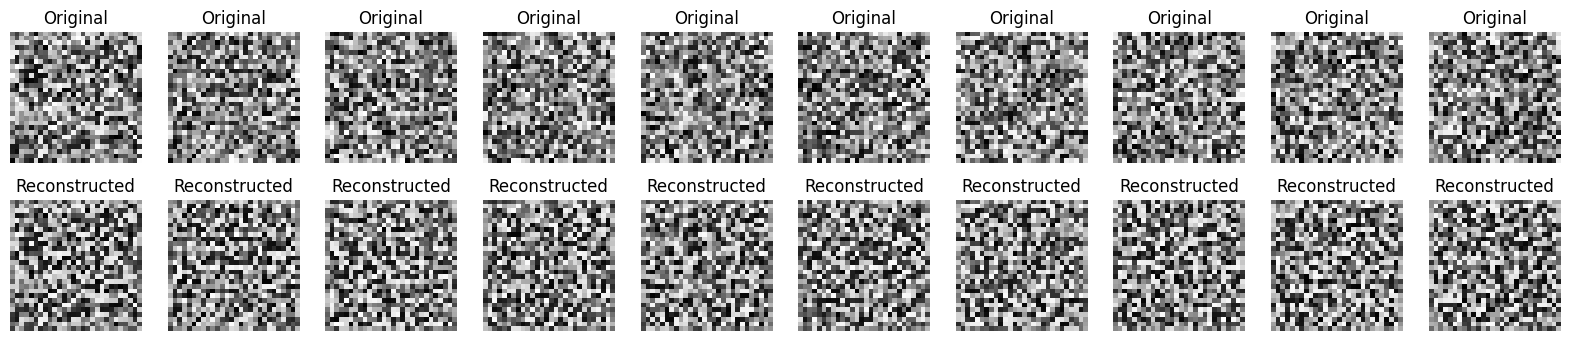

In [8]:
# Predict on test data 
y_pred = model.predict(X_test) 

# Plot some sample images 

n = 10 # Number of samples to display 

plt.figure(figsize=(20, 4))

for i in range(n): 

    # Display original 
    ax = plt.subplot(2, n, i + 1) 
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original") 
    plt.axis('off') 
    # Display reconstruction 
    ax = plt.subplot(2, n, i + 1 + n) 
    plt.imshow(y_pred[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show() 

**Explanation:**

`model.predict` generates predictions for the test data. 

`plt.imshow` visualizes the original and reconstructed images side by side for comparison. 


### Practice exercises


#### Exercise 1: Experiment with Different Kernel Sizes 

**Objective:** Understand the impact of different kernel sizes on the model's performance. 

**Instructions:**
1. Modify the kernel size of the `Conv2D` and `Conv2DTranspose` layers. 
2. Recompile, train, and evaluate the model. 
3. Observe and record the differences in performance.


In [9]:
# Write your code here
from tensorflow.keras.layers import Dropout, Conv2D, Conv2DTranspose, Input
from tensorflow.keras.models import Model

# Define the input layer
input_layer = Input(shape=(28, 28, 1))

# Add convolutional and transpose convolutional layers with different kernel sizes
conv_layer = Conv2D(filters=32, kernel_size=(5, 5), activation='relu', padding='same')(input_layer)
transpose_conv_layer = Conv2DTranspose(filters=1, kernel_size=(5, 5), activation='sigmoid', padding='same')(conv_layer)

# Create the model
model = Model(inputs=input_layer, outputs=transpose_conv_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0772 - val_loss: 0.0487
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0403 - val_loss: 0.0191
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0152 - val_loss: 0.0070
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0060 - val_loss: 0.0041
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0039 - val_loss: 0.0034
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0033 - val_loss: 0.0030
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0027 - val_loss: 0.0025
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0025 - val_loss: 0.0023
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0023 - val_loss: 0.0022
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0022
Test loss: 0.002208267105743289


<details>
<summary>Click here for solution</summary> </br>

```python
from tensorflow.keras.layers import Dropout, Conv2D, Conv2DTranspose, Input
from tensorflow.keras.models import Model

# Define the input layer
input_layer = Input(shape=(28, 28, 1))

# Add convolutional and transpose convolutional layers with different kernel sizes
conv_layer = Conv2D(filters=32, kernel_size=(5, 5), activation='relu', padding='same')(input_layer)
transpose_conv_layer = Conv2DTranspose(filters=1, kernel_size=(5, 5), activation='sigmoid', padding='same')(conv_layer)

# Create the model
model = Model(inputs=input_layer, outputs=transpose_conv_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')


#### Exercise 2: Add Dropout Layers

**Objective:** Add dropout layers to prevent overfitting.

**Instructions:**
1. Add dropout layers after the convolutional layer. 
2. Set the dropout rate to 0.5.
3. Recompile, train, and evaluate the model.


In [ ]:
# Write your code here


# Define the input layer
input_layer = Input(shape=(28, 28, 1))

# Add convolutional and transpose convolutional layers with different kernel sizes
conv_layer = Conv2D(filters=32, kernel_size=(5, 5), activation='relu', padding='same')(input_layer)

transpose_conv_layer = Conv2DTranspose(filters=1, kernel_size=(5, 5), activation='sigmoid', padding='same')(conv_layer)

# Create the model
model = Model(inputs=input_layer, outputs=transpose_conv_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

<details>
<summary>Click here for solution</summary> </br>

```python
from tensorflow.keras.layers import Dropout, Conv2D, Conv2DTranspose, Input
from tensorflow.keras.models import Model

# Define the input layer
input_layer = Input(shape=(28, 28, 1))

# Add convolutional, dropout, and transpose convolutional layers
conv_layer = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(input_layer)
dropout_layer = Dropout(0.5)(conv_layer)
transpose_conv_layer = Conv2DTranspose(filters=1, kernel_size=(3, 3), activation='sigmoid', padding='same')(dropout_layer)

# Create the model
model = Model(inputs=input_layer, outputs=transpose_conv_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')


#### Exercise 3: Use Different Activation Functions 

**Objective:** Experiment with different activation functions and observe their impact on model performance. 

**Instructions:**
1. Change the activation function of the convolutional and transpose convolutional layers to `tanh`. 
2. Recompile, train, and evaluate the model.


In [ ]:
# Write your code here

<details>
<summary>Click here for solution</summary> </br>

```python

from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Input
from tensorflow.keras.models import Model

# Define the input layer
input_layer = Input(shape=(28, 28, 1))

# Add convolutional and transpose convolutional layers with different activation functions
conv_layer = Conv2D(filters=32, kernel_size=(3, 3), activation='tanh', padding='same')(input_layer)
transpose_conv_layer = Conv2DTranspose(filters=1, kernel_size=(3, 3), activation='tanh', padding='same')(conv_layer)

# Create the model
model = Model(inputs=input_layer, outputs=transpose_conv_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')



### Conclusion:

By completing this lab, you have successfully created, trained, and evaluated a simple neural network model using transpose convolution for image reconstruction. This exercise provided hands-on experience with Keras and practical applications of transpose convolution layers. Continue experimenting with different architectures and datasets to deepen your understanding and skills in deep learning with Keras. 


Copyright © IBM Corporation. All rights reserved.
